En primer lugar, se tiene que cambiar la carpeta en la que se ejecuta el código. Esto se utiliza para que, a la hora de importar las librerias, el código sepa dónde está la carpeta src.

El siguiente bloque de codigo solo debe ser ejecutado una vez. El objetivo es que el print sea la carpeta raiz del repositorio

In [8]:
import os

current_folder = os.path.basename(os.getcwd())
if current_folder == "optimizaciones":
    os.chdir("..")
    print(os.getcwd())
else:
    print("Ya estás en la carpeta TRABAJO-DOM")

Ya estás en la carpeta TRABAJO-DOM


Se importan las librerias

In [9]:
#### IMPORTAR LIBRERIAS ####
from src.models.car import Car # Modelo del coche
from src.models.track import Track # Modelo de la pista
from src.models.aero import Aero
from src.simulator.lap_simulator import LapSimulator # Simulador de vuelta

# Librerias para graficar
import matplotlib.pyplot as plt

# Librerias para el manejo de datos
import numpy as np

In [10]:
mass = 850
tire_grip = 1.0
power = 200000
brake_force = 150000
cl_alpha_front = 0.4
cl_alpha_rear = 0.3
cd_alpha_front = 0.2
cd_alpha_rear = 0.15
fw_area = 1.8
rw_area = 1.6

Se definen, a continuacion, las caracteristicas aerodinamicas del coche. Esto son parámetros FIJOS, los que no cambian durante la optimización. Por otro lado, la manera de cambiar las cosas que se optimizan (que son los ángulos de ataque) se definen luego



In [11]:
aero = Aero(cl_alpha_front = cl_alpha_front, 
            cl_alpha_rear = cl_alpha_rear, 
            cd_alpha_front = cd_alpha_front, 
            cd_alpha_rear = cd_alpha_rear, 
            fw_area = fw_area, 
            rw_area = rw_area
        )

No obstante, si luego se quisiese cambiar alguno de estos parámetros, obviamente se podría. Solo habría que escribir lo siguiente:

```python
aero.fw_area = 1.7
```

Ahora, defines los parámetros del coche, incluso los que se van a optimizar

In [12]:
car = Car(mass = mass, 
          tire_grip = tire_grip, 
          power = power, 
          brake_force = brake_force, 
          aero = aero
        )

Lo único que se debe cambiar para llevar la optimización, es el valor del parámetro a optimizar. Por ejemplo, si quisiéramos optimizar (por algún motivo ilógico dada su trivialidad) la masa, solo habría que hacer lo siguiente:

In [13]:
print(f"Masa del coche: {car.mass} kg") 
car.mass = 800 # cambio de masa
print(f"Masa del coche: {car.mass} kg")

Masa del coche: 850 kg
Masa del coche: 800 kg


A pesar de que todos los parámetros se cambian haciendo 

```car.mass = 500``` o ```aero.fw_area = 2```

El ángulo de ataque, dado que provoca cambios en otros parámetros, se cambia de la siguiente forma:

```aero.set_aoa(5)```

In [14]:
aero.set_aoa(4) # Establecer el ángulo de ataque
print(f"Angulo de ataque: {aero.aoa} grados")
print(f"Coeficiente de sustentación del alerón delantero: {aero.cl_front}")

aero.set_aoa(8) # Establecer el ángulo de ataque
print(f"Angulo de ataque: {aero.aoa} grados")
print(f"Coeficiente de sustentación del alerón delantero: {aero.cl_front}")

Angulo de ataque: 4 grados
Coeficiente de sustentación del alerón delantero: 1.6
Angulo de ataque: 8 grados
Coeficiente de sustentación del alerón delantero: 3.2


**Recapitulando**

Para cambiar los parámetros, se hace así:

In [15]:
car.mass = 800
aero.set_aoa(4) # Establecer el ángulo de ataque

Para crear el circuito, se hace desde el archivo json

In [ ]:
track = Track.from_json("track.json")

El simulador, finalmente, se hace creando el siguiente objeto

In [19]:
simulator = LapSimulator(car, track)

Para simular, simplemente se llama al siguiente metodo

In [20]:
lap_time, v = simulator.simulate_lap()

# Mostrar el resultado por pantalla
print(f"Tiempo de vuelta: {lap_time} s")

Tiempo de vuelta: 35.877557513164064 s


A la hora de optimizar, lo unico que se necesita hacer es crear una función que **envuelva** a lo que estamos optimizando. Esto se llama *wrapper*, y se hace de la siguiente forma

In [ ]:
def f(aoa):
    aero.set_aoa(aoa)
    lap_time, _ = simulator.simulate_lap()
    return lap_time


"""
De esta forma, f es una función que depende de solo el angulo de ataque.
Podemos usar scipy.optimize para encontrar el mínimo de f.
"""

resultado = f(4)  # Tiempo de vuelta con ángulo de ataque de 4 grados
print(resultado)

35.877557513164064


*IGNORAR ESTO

***Este plot está pendiente de meterse dentro de src***

Tiempo de vuelta: 35.88 s


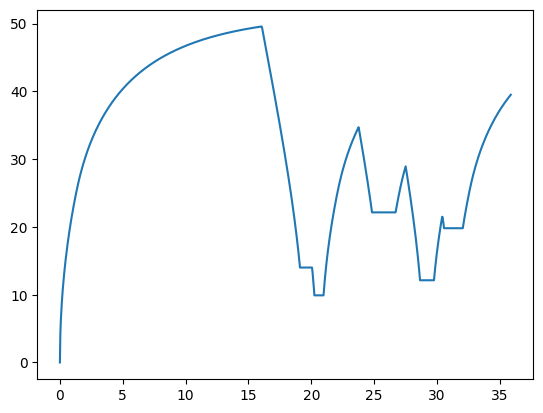

In [ ]:
simulator = LapSimulator(car, track)
lap_time, v = simulator.simulate_lap()


# Mostrar el resultado por pantalla
print(f"Tiempo de vuelta: {lap_time:.2f} s")

t = np.linspace(0, lap_time, len(v), endpoint=True)

plt.plot(t, v, label="Velocidad (m/s)")
plt.show()